# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import seaborn as sns
np.random.seed(2360873)
N = 100

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [7]:
df1 = df.drop(df[['Unnamed: 0','data_ref', 'index']], axis=1)
df1

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [8]:
# mostrando a matriz de correlação
df2 = df1.corr()
df2

C:\Users\willi\AppData\Local\Temp\ipykernel_12072\3420568360.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df1.corr()


,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


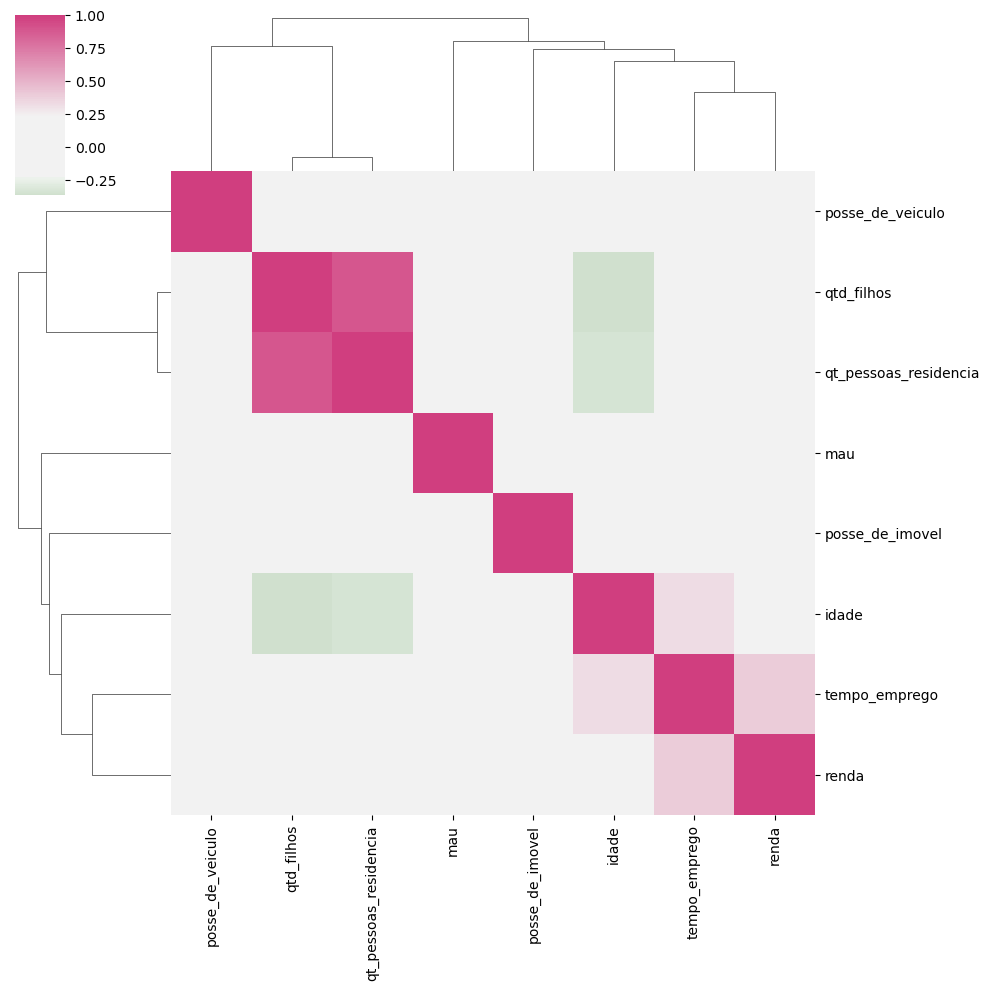

In [9]:
#gráfico da matriz
#construindo a paleta de cores
#sns.diverging_palette(): constrói uma paleta degrade entre duas cores HUSL
cmap = sns.diverging_palette(h_neg=125, #a cor do menor valor da matriz :-1
h_pos=350, #a cor do maior valor da matriz :+1
as_cmap=True, # Se True, retorna uma classe :class:`matplotlib.colors.Colormap`
sep = 60, #Tamanho da região intermediária
center = 'light'# Se o centro da paleta é claro(light) ou escuro(dark)
)

#construindo o gráfico
sns.clustermap(df2, figsize=(10, 10), center = 0, cmap=cmap)

A quantidade de filhos tem forte relação com a quantidade de pessoas na residência, mas quanto a renda, nessa primeira análise temos apenas uma fraca correlação com o tempo de emprego.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

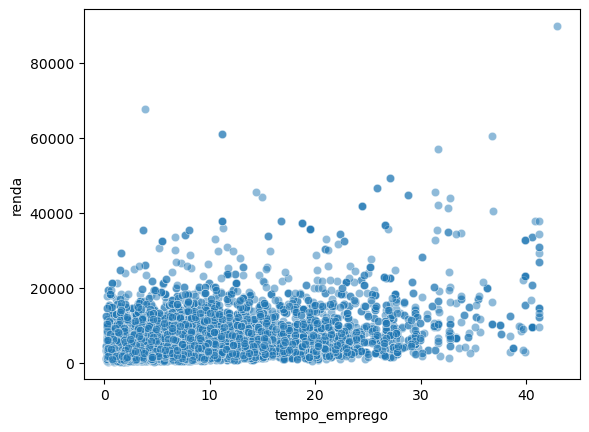

In [12]:
sns.scatterplot(x = 'tempo_emprego'
, y = 'renda'
, data = df1
, alpha = .5
)

<Axes: xlabel='idade', ylabel='renda'>

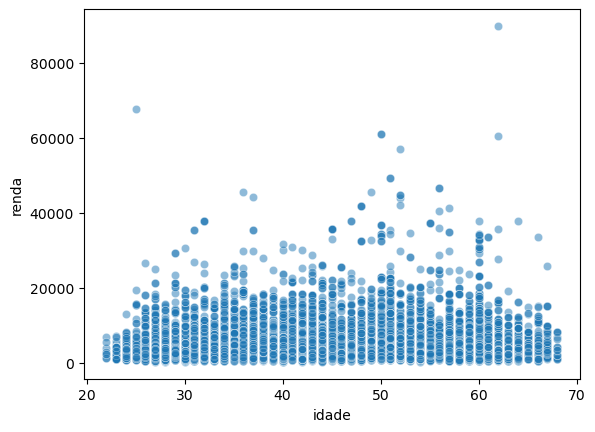

In [13]:
sns.scatterplot(x = 'idade'
, y = 'renda'
, data = df1
, alpha = .5
)

3) Na su aopinião, há outliers na variável renda?

A grande maioria das pessoas estão concentradas na faixa de renda de 0 a 20 mil, há alguns poucos com renda muito acima dessa faixa (o que inclusive tonra difícil a avaliação do gráfico scatterplot), podendo ser outliers.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [14]:
df1_log = df1.copy()
df1_log['log_renda'] = np.log(df1_log['renda'])

In [15]:
# mostrando a matriz de correlação df_renda_quant_log
df1_log.corr()

C:\Users\willi\AppData\Local\Temp\ipykernel_12072\581921125.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1_log.corr()


,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414,0.090529
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827,0.045297
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567,0.023743
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570,0.024712
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,0.379556
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977,0.036267
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577,-0.014193
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000,0.835734
log_renda,0.090529,0.045297,0.023743,0.024712,0.379556,0.036267,-0.014193,0.835734,1.000000


C:\Users\willi\AppData\Local\Temp\ipykernel_12072\1575645538.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df1_log.corr(), figsize=(10, 10), center = 0, cmap=cmap)


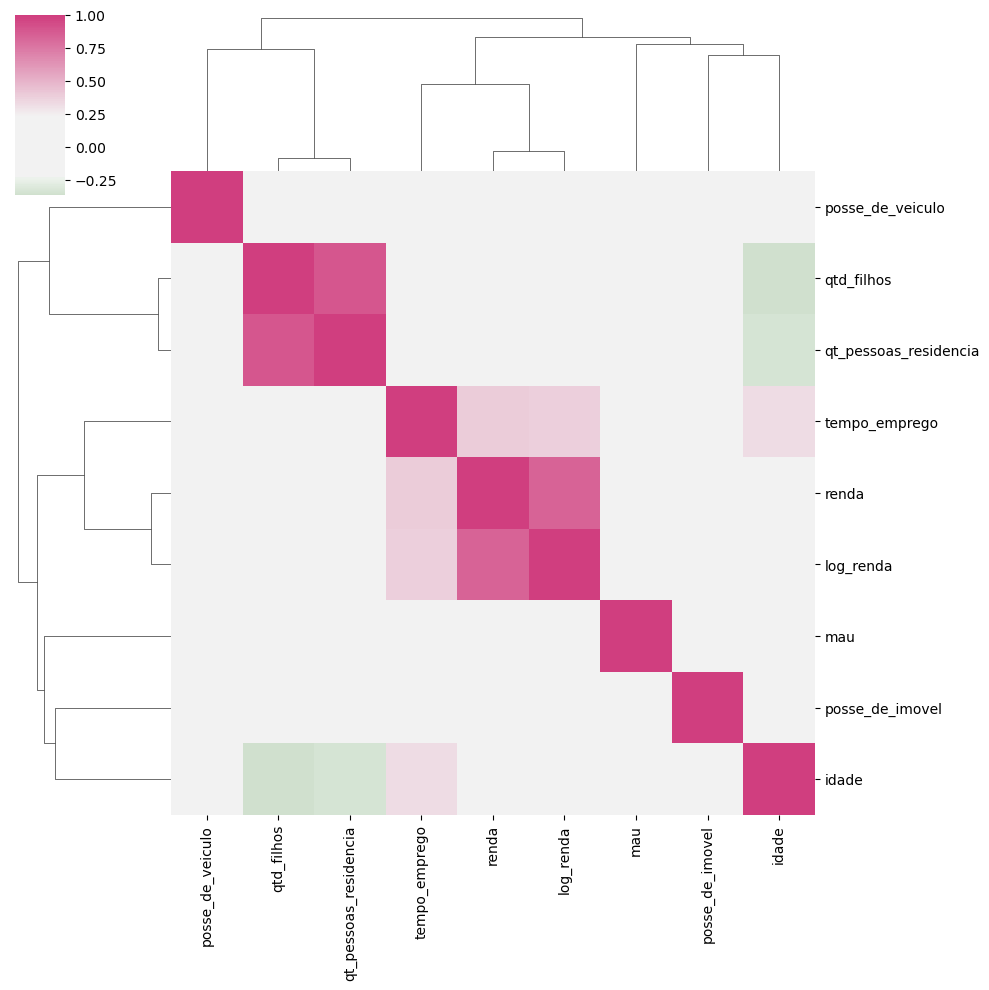

In [16]:
#gráfico da matriz
#construindo a paleta de cores
#sns.diverging_palette(): constrói uma paleta degrade entre duas cores HUSL
cmap = sns.diverging_palette(h_neg=125, #a cor do menor valor da matriz :-1
h_pos=350, #a cor do maior valor da matriz :+1
as_cmap=True, # Se True, retorna uma classe :class:`matplotlib.colors.Colormap`
sep = 60, #Tamanho da região intermediária
center = 'light'# Se o centro da paleta é claro(light) ou escuro(dark)
)

#construindo o gráfico
sns.clustermap(df1_log.corr(), figsize=(10, 10), center = 0, cmap=cmap)


<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

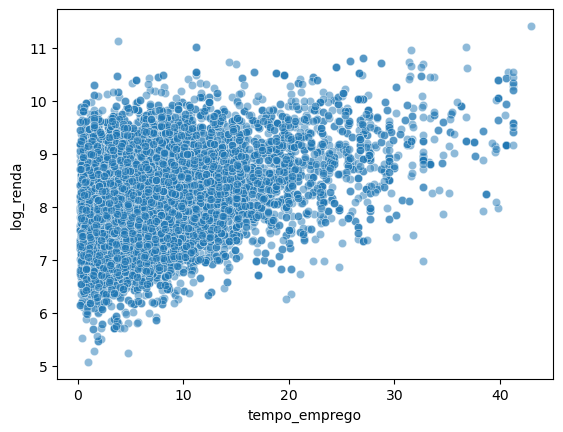

In [17]:
sns.scatterplot(x='tempo_emprego', y='log_renda', data = df1_log, alpha = .5)

<Axes: xlabel='idade', ylabel='log_renda'>

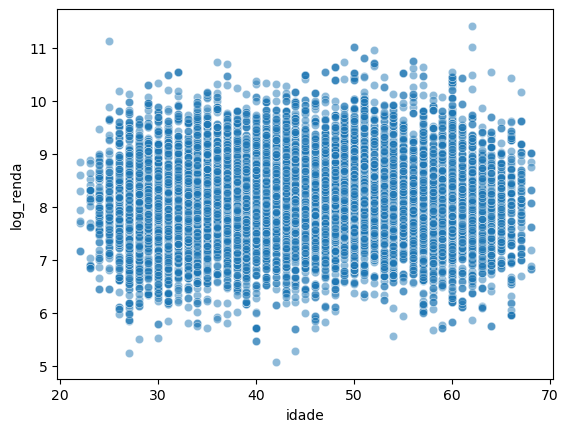

In [18]:
sns.scatterplot(x='idade', y='log_renda', data = df1_log, alpha = .5)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do log nesse caso em estudo não trouxe melhoras significativas